Find the regression model that fits the best the data given in the attached Excel file. Explain your choice.

## Arturo Efren Jimenez Garibaldy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Shuffle data frame
df.sample(frac = 1).reset_index(drop=True)

,X,Y
0,56,2.384167
1,40,2.488611
2,64,2.254444
3,68,2.203056
4,8,3.792500
...,...,...
79,108,2.181944
80,64,2.288333
81,16,2.615278
82,52,2.585556


In [4]:
# Description of data X, Y
df.describe()

,X,Y
count,84.000000,84.000000
mean,62.428571,2.461935
std,36.823344,0.371839
min,0.000000,2.108889
25%,31.000000,2.185625
50%,66.000000,2.314444
75%,93.000000,2.584306
max,120.000000,3.792500


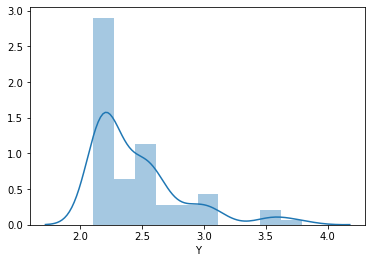

In [5]:
sns.distplot(df['Y'])

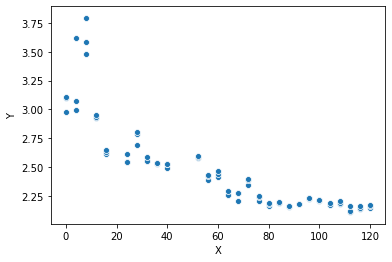

In [6]:
sp = sns.scatterplot(x = 'X', y = 'Y', data = df)

## Linear Regression Model

First we are going to use a Simple Linear Regression

In [7]:
from scipy import stats

In [8]:
X = df['X']
y = df['Y']
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

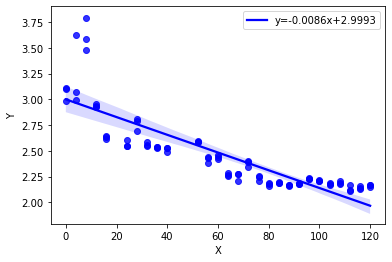

In [9]:
# use line_kws to set line label for legend
ax = sns.regplot(x='X', y='Y', data=df, color='b', 
 line_kws={'label':"y={0:.4f}x+{1:.4f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [10]:
print("R^2: ", r_value**2)
print("Standard error: ", std_err)
print("P value: ", p_value)

R^2:  0.7266821924787057
Standard error:  0.0005829871299650774
P value:  8.212928410298442e-25


The R^2 statistic is a measure of the linear relationship between X and Y. Since it can be shown that in simple linear regression the correlation coefficient r is equal to R and R value is relatively high, we can conclude that there exist a relation between the X predictor and Y response. 

However, the linear model does not seems to fit so well. This is because the relation X, Y seems like a polynomial relation. In other words, Our model understimates the real function behaviour of the data (there is more BIAS error).

The next step is take a more flexible model until reach a better model regression.

## Non-Linear Model - Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
X = df[['X']]

In [131]:
# Visualizing the Polynomial Regression results
def viz_polynomial(X, y, y_pred):
    plt.scatter(X, y, color='red')
    plt.plot(X, y_pred, color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [60]:
# Creating Polynomial regression of degree n
def pol_regression(X, y, n):
    poly_reg = PolynomialFeatures(degree=n)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    y_pred = pol_reg.predict(X_poly)
    return pol_reg, X_poly, y_pred

#### Polynomial Regression - Order 2

In [61]:
# Fitting Polynomial Regression to the dataset
pol_reg, X_poly, y_pred = pol_regression(X, y, 2)

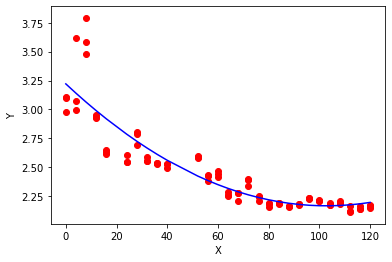

In [62]:
viz_polynomial(X, y, y_pred)

In [63]:
print('R^2:', r2_score(y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

R^2: 0.8254817231525555
RMSE: 0.1544098568538646


#### Polynomial Regression - Order 3

In [64]:
# Fitting Polynomial Regression to the dataset
pol_reg, X_poly, y_pred = pol_regression(X, y, 3)

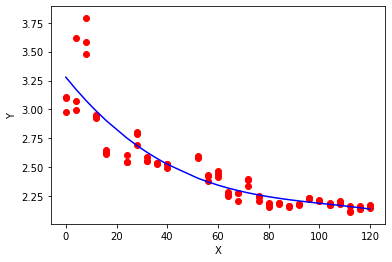

In [65]:
viz_polynomial(X, y, y_pred)

In [67]:
print('R^2:', r2_score(y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

R^2: 0.8312591873270857
RMSE: 0.15183246065922867


#### Polynomial Regression - Order 5

In [69]:
# Fitting Polynomial Regression to the dataset
pol_reg, X_poly, y_pred = pol_regression(X, y, 5)

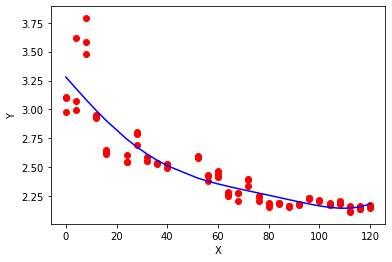

In [70]:
viz_polynomial(X, y, y_pred)

In [71]:
print('R^2:', r2_score(y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

R^2: 0.8330339484941464
RMSE: 0.15103188775243695


#### Polynomial Regression - Order 7

In [85]:
# Fitting Polynomial Regression to the dataset
pol_reg, X_poly, y_pred = pol_regression(X, y, 7)

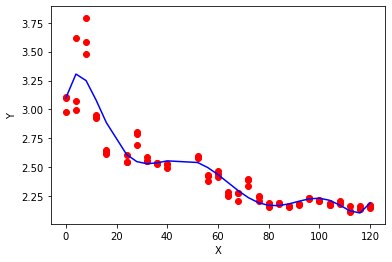

In [86]:
viz_polynomial(X, y, y_pred)

In [87]:
print('R^2:', r2_score(y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

R^2: 0.8868583345171804
RMSE: 0.124327112124074


#### Polynomial Regression - Order 9

In [79]:
# Fitting Polynomial Regression to the dataset
pol_reg, X_poly, y_pred = pol_regression(X, y, 9)

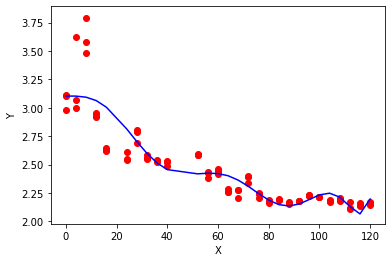

In [80]:
viz_polynomial(X, y, y_pred)

In [81]:
print('R^2:', r2_score(y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

R^2: 0.8149090554722724
RMSE: 0.15901831530359933


### Analysis

If we are interested only in find a way to fit the data as best as possible, then in general the best approach could be take the polynomial regression with the greatest possible degree until some limit. This is because the regression model will work so hard to find the pattern that best fit the data. 

However, it is important to emphasize that if we are interested know the truly form of the function that relates the independent variable with the one dependent variable, there is no guarantee that the method with the largest R^2 (in the training data) will also have the largest R^2 in the real function.

The problem arises when we select a polynomial model with a larger degree, because we could overfit the data to produce our function model.

In order to minimize the expected, we need to select a statistical method that simultaneously achieves low variance and low bias. Variance refers to the error in our model produced by the change in the function approximation. As a general rule, as we use more flexible methods (polynomial regression), the variance will increase, and the bias will decrease.

Linear regression -> Low variance, high bias

Polynomial regression (medium degree) -> Low-medium variance, High-medium bias

Polynomial regression (high degree) -> High variance, low bias

In this sense, the polynomial regression that seems to be the better approach in this situation would be the polynomial degree = 7. Nevertheless, the most appropriate way to ensure this is using a statistical test model.

## Exponential Regression

In [91]:
from scipy.optimize import curve_fit

In [149]:
# Model function
def func(x, a, b):
    return a * np.exp(-b * x)

In [163]:
# Visualizing the Exponential Regression results
def viz_exponential(xdata, popt):
    plt.scatter(X, y, color='red')
    plt.plot(xdata, func(xdata, *popt), 'b--',
             label='fit: a=%5.5f, b=%5.5f, ' % tuple(popt))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def viz_test(xdata, popt, axe):
    axe.scatter(X, y, color='red')
    axe.plot(xdata, func(xdata, *popt), 'b--',
             label='fit: a=%5.5f, b=%5.5f, ' % tuple(popt))

In [187]:
xdata = df['X']
ydata = df['Y']

# From y = Ae^(bx)
# Guess 1
popt1, pcov1 = curve_fit(func, xdata, ydata, bounds=(0, [3., 0.005]))
# Guess 2
popt2, pcov2 = curve_fit(func, xdata, ydata, bounds=(0, [2.5, 0.003]))
# Guess 3
popt3, pcov3 = curve_fit(func, xdata, ydata, bounds=(0, [5., 0.1]))

Guess 


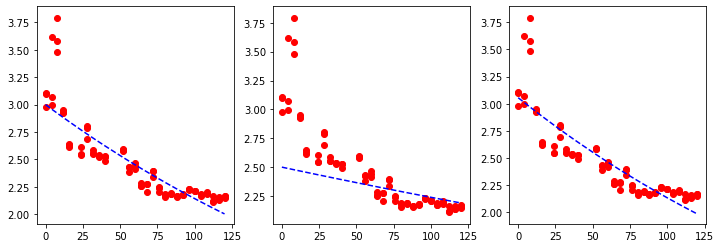

In [191]:
print("Guess ")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

viz_test(xdata, popt1, axes[0])
viz_test(xdata, popt2, axes[1])
viz_test(xdata, popt3, axes[2])

residuals = ydata - func(xdata, *popt1)
ss_res = np.sum(residuals**2)

In [215]:
ss_tot = np.sum((ydata-np.mean(ydata))**2)

In [216]:
r_squared = 1 - (ss_res / ss_tot)

The best approach seems to be the first option.

In [217]:
print('R^2:', r_squared)

R^2: 0.7505344569869187


### Analysis

If we compare the exponential regression with the linear and polynomial regression, we see that the value of R ^ 2 is worse than that of polynomial regression.

We conclude that the best regression that fits the data is the polynomial with degree = 7 because it is the model with the highest R^2 value, medium variance and low bias.